In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Upload file CSV ke Google Colab
from google.colab import files
uploaded = files.upload()

# Membaca dataset
df = pd.read_csv('creditcard.csv')
df.head()

Saving creditcard.csv to creditcard.csv


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

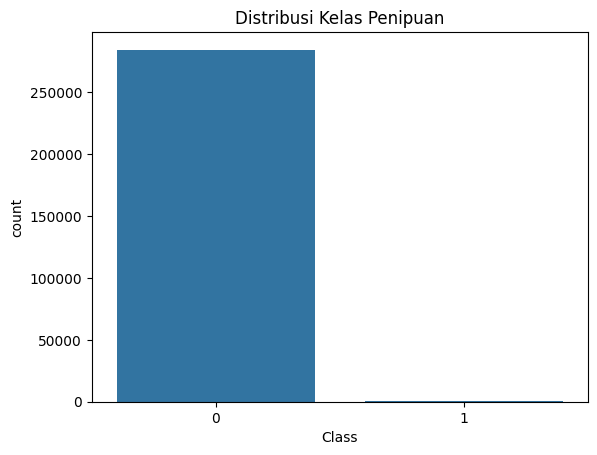

In [3]:
print(df.info())
print(df.describe())

# Memeriksa distribusi kelas
sns.countplot(x='Class', data=df)
plt.title('Distribusi Kelas Penipuan')
plt.show()

In [4]:
# Memisahkan fitur dan label
X = df.drop(columns='Class')
y = df['Class']

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Membangun model Deep Learning untuk feature extraction
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Melatih model
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Menggunakan model untuk feature extraction
intermediate_layer_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer(index=-2).output)
X_train_new = intermediate_layer_model.predict(X_train)
X_test_new = intermediate_layer_model.predict(X_test)

Epoch 1/10
5697/5697 [==============================] - 15s 2ms/step - loss: 0.0092 - accuracy: 0.9989 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 2/10
5697/5697 [==============================] - 14s 2ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 3/10
5697/5697 [==============================] - 15s 3ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 4/10
5697/5697 [==============================] - 15s 3ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 5/10
5697/5697 [==============================] - 15s 3ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 6/10
5697/5697 [==============================] - 15s 3ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 7/10
5697/5697 [==============================] - 14s 2ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0030 - val_ac

In [5]:
# Membangun model KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_new, y_train)

# Memprediksi dengan model KNN
y_pred = knn.predict(X_test_new)

In [6]:
# Evaluasi model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[56851    13]
 [   26    72]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.73      0.79        98

    accuracy                           1.00     56962
   macro avg       0.92      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962


Accuracy Score:
0.9993153330290369
